In [5]:
import tables
import jkutils
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook

In [6]:
def get_index(txtfile):
    with open(txtfile, 'r') as f:
        return int(f.readline().strip().split('/')[-2][1])

In [7]:
def summary(zenith, zenith_linefit):
    eq_arr = zenith_to_binary(zenith) == zenith_to_binary(zenith_linefit)
    z0=zenith<math.pi/2
    z1=zenith>math.pi/2
    print "zenith<pi/2: {:.2f}%".format(
        100.0*np.sum(eq_arr[z0])/len(zenith[z0]))
    print "zenith>pi/2: {:.2f}%".format(
        100.0*np.sum(eq_arr[z1])/len(zenith[z1]))
    print "total: {:.2f}%".format(
        100.0*np.sum(eq_arr)/len(zenith))

In [8]:
data_path_high='/data/user/tglauch/ML_Reco/training_data/hex_grid_highE/'
data_path_low='/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/'
files_high = sorted([os.path.join(data_path_high, f) for f in os.listdir(data_path_high) if os.path.isfile(os.path.join(data_path_high, f))
                and '.npy' in f])
files_high = [(f, os.path.join(data_path_high, f[:-3]+'txt')) for f in files_high if os.path.isfile(os.path.join(data_path_high, f[:-3]+'txt'))]
files_low = sorted([os.path.join(data_path_low, f) for f in os.listdir(data_path_low) if os.path.isfile(os.path.join(data_path_low, f))
                and '.npy' in f])
files_low = [(f, os.path.join(data_path_low, f[:-3]+'txt')) for f in files_low if os.path.isfile(os.path.join(data_path_low, f[:-3]+'txt'))]
file_test = '/data/user/jkager/ML_Reco/training_data/test_highE/File_0.h5'
file_test_tw = '/data/user/jkager/ML_Reco/training_data/test_highE_TWHV/File_0.h5'

In [10]:
files_low

[('/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_0.npy',
  '/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_0.txt'),
 ('/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_1.npy',
  '/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_1.txt'),
 ('/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_2.npy',
  '/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_2.txt'),
 ('/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_3.npy',
  '/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_3.txt'),
 ('/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_4.npy',
  '/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_4.txt'),
 ('/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_5.npy',
  '/data/user/tglauch/ML_Reco/training_data/hex_grid_lowE/File_5.txt')]

In [9]:
for f in files_low+files_high:
    print '/'.join(f[0].split('/')[-2:]), '0{0}000-0{0}999'.format(get_index(f[1]))

hex_grid_lowE/File_0.npy 04000-04999
hex_grid_lowE/File_1.npy 05000-05999
hex_grid_lowE/File_2.npy 03000-03999
hex_grid_lowE/File_3.npy 01000-01999
hex_grid_lowE/File_4.npy 02000-02999
hex_grid_lowE/File_5.npy 00000-00999
hex_grid_highE/File_0.npy 04000-04999
hex_grid_highE/File_1.npy 05000-05999
hex_grid_highE/File_2.npy 03000-03999
hex_grid_highE/File_3.npy 01000-01999
hex_grid_highE/File_4.npy 02000-02999
hex_grid_highE/File_5.npy 06000-06999
hex_grid_highE/File_6.npy 07000-07999
hex_grid_highE/File_7.npy 00000-00999


In [10]:
openfiles_high=map(lambda x: tables.open_file(x[0]), sorted(files_high, key=lambda x: get_index(x[1])))
openfiles_low=map(lambda x: tables.open_file(x[0]), sorted(files_low, key=lambda x: get_index(x[1])))
open_test=tables.open_file(file_test)
open_test_tw=tables.open_file(file_test_tw)

In [11]:
open_test

File(filename=/data/user/jkager/ML_Reco/training_data/test_highE/File_0.h5, title='Events for training the NN', mode='r', root_uep='/', filters=Filters(complevel=9, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) 'Events for training the NN'
/charge (EArray(33838, 12, 11, 61, 1), shuffle, zlib(9)) 'Sum(Charge)'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (2, 12, 11, 61, 1)
/first_charge (EArray(33838, 12, 11, 61, 1), shuffle, zlib(9)) 'amplitude of the first charge'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (2, 12, 11, 61, 1)
/reco_vals (Table(33838,), shuffle, zlib(9)) ''
  description := {
  "azimuth": Float64Col(shape=(), dflt=0.0, pos=0),
  "zenith": Float64Col(shape=(), dflt=0.0, pos=1),
  "energy": Float64Col(shape=(), dflt=0.0, pos=2),
  "azimuth_linefit_hv": Float64Col(shape=(), dflt=0.0,

In [17]:
for i in openfiles_high:
    print i.root.charge.shape[0]

207254
209640
209797
207050
205701
198759
53438
1495


In [56]:
len(openfiles_high), len(openfiles_low)

(8, 6)

In [12]:
f=openfiles_high[0]
ftest=open_test

In [13]:
f

File(filename=/data/user/tglauch/ML_Reco/training_data/hex_grid_highE/File_7.npy, title='Events for training the NN', mode='r', root_uep='/', filters=Filters(complevel=9, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) 'Events for training the NN'
/charge (EArray(207254, 12, 11, 61, 1), shuffle, zlib(9)) 'Sum(Charge)'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (2, 12, 11, 61, 1)
/first_charge (EArray(207254, 12, 11, 61, 1), shuffle, zlib(9)) 'amplitude of the first charge'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (2, 12, 11, 61, 1)
/reco_vals (Table(207254,), shuffle, zlib(9)) ''
  description := {
  "azimuth": Float64Col(shape=(), dflt=0.0, pos=0),
  "zenith": Float64Col(shape=(), dflt=0.0, pos=1),
  "muex": Float64Col(shape=(), dflt=0.0, pos=2),
  "ow": Float64Col(shape=(), dflt=0.0, pos=3),


In [14]:
zenith=f.root.reco_vals[:]["zenith"]
zenith_linefit=f.root.reco_vals[:]["zenith_linefit"]

In [32]:
endindexhv=len(ftest.root.reco_vals)
for i in range(endindexhv):
    try:
        ftest.root.reco_vals[i]["zenith_linefit_hv"]
    except:
        endindexhv = i
        break
endindextw=len(ftest.root.reco_vals)
for i in range(endindextw):
    try:
        ftest.root.reco_vals[i]["zenith_linefit_twhv"]
    except:
        endindextw = i
        break

In [33]:
endindexhv, endindextw, len(ftest.root.reco_vals)

(33670, 33670)

<IPython.core.display.Javascript object>


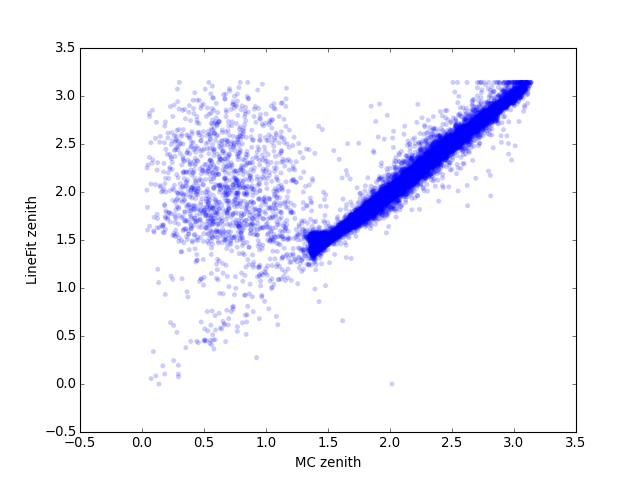

In [34]:
plt.figure()
plt.scatter(ftest.root.reco_vals[:endindexhv]["zenith"], ftest.root.reco_vals[:endindexhv]["zenith_linefit_hv"],edgecolor='none',alpha=0.2)
plt.xlabel("MC zenith")
plt.ylabel("LineFit zenith")

<IPython.core.display.Javascript object>


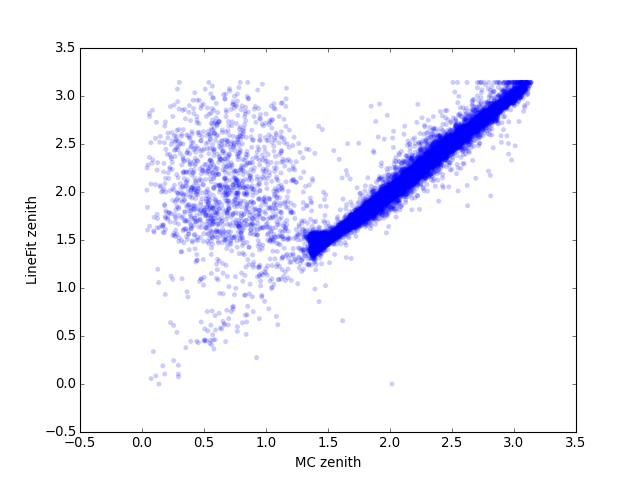

In [36]:
plt.figure()
plt.scatter(ftest.root.reco_vals[:endindextw]["zenith"], ftest.root.reco_vals[:endindextw]["zenith_linefit_twhv"],edgecolor='none',alpha=0.2)
plt.xlabel("MC zenith")
plt.ylabel("LineFit zenith")

zenith_linefit_gs1 33670


<IPython.core.display.Javascript object>


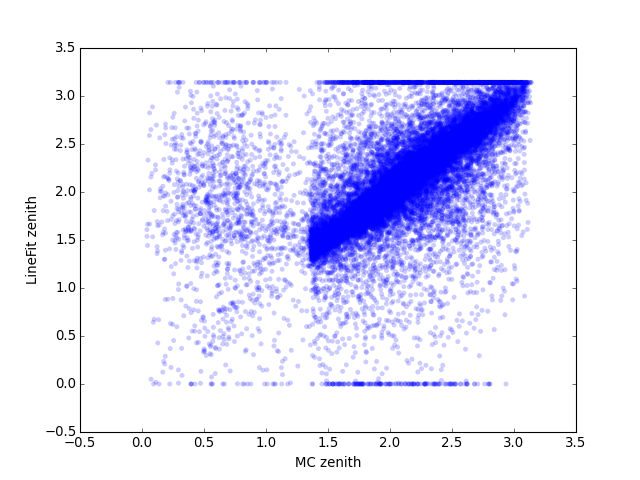

zenith_linefit_gs2 33670


<IPython.core.display.Javascript object>


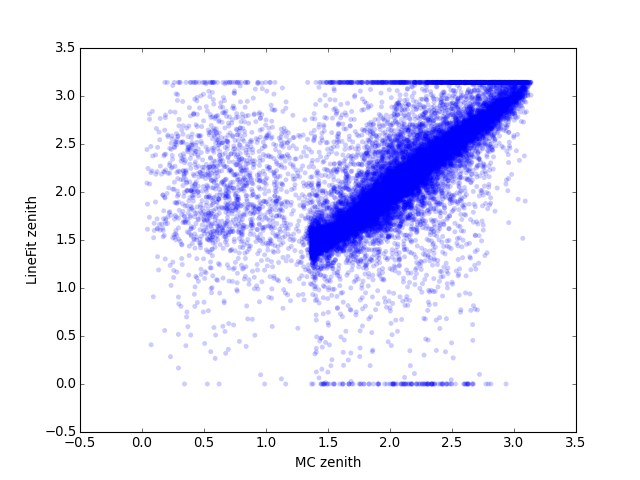

zenith_linefit_ts1 33670


<IPython.core.display.Javascript object>


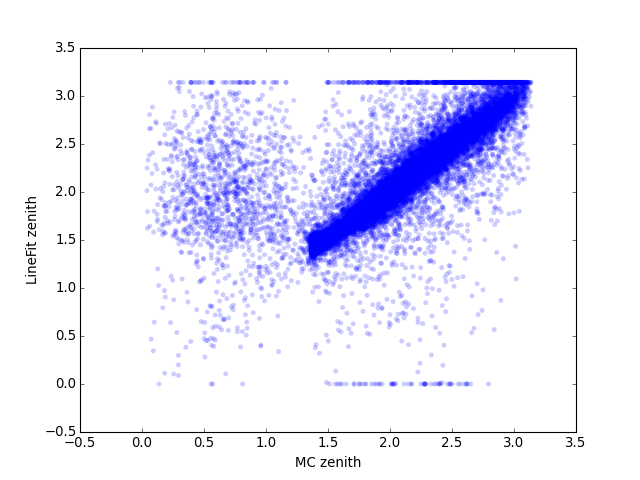

zenith_linefit_ts2 33670


<IPython.core.display.Javascript object>


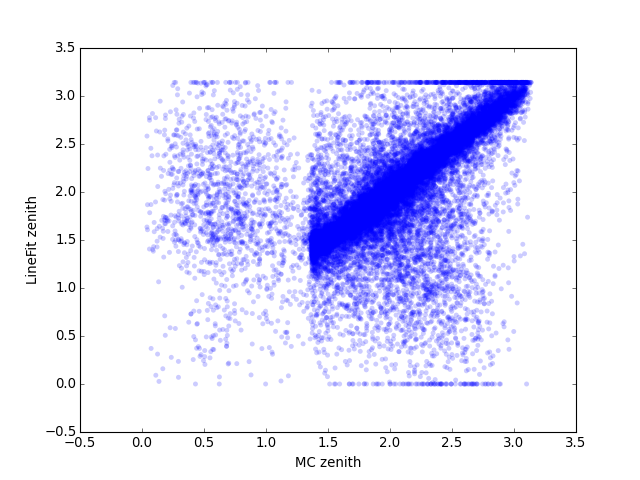

In [37]:
var = ["zenith_linefit_gs1", "zenith_linefit_gs2", "zenith_linefit_ts1", "zenith_linefit_ts2"]
for v in var:
    endindex=len(ftest.root.reco_vals)
    for i in range(endindex):
        try:
            ftest.root.reco_vals[i][v]
        except:
            endindex = i
            break
    print v, endindex
    plt.figure()
    plt.scatter(ftest.root.reco_vals[:endindex]["zenith"], ftest.root.reco_vals[:endindex][v],edgecolor='none',alpha=0.2)
    plt.xlabel("MC zenith")
    plt.ylabel("LineFit zenith")

<IPython.core.display.Javascript object>


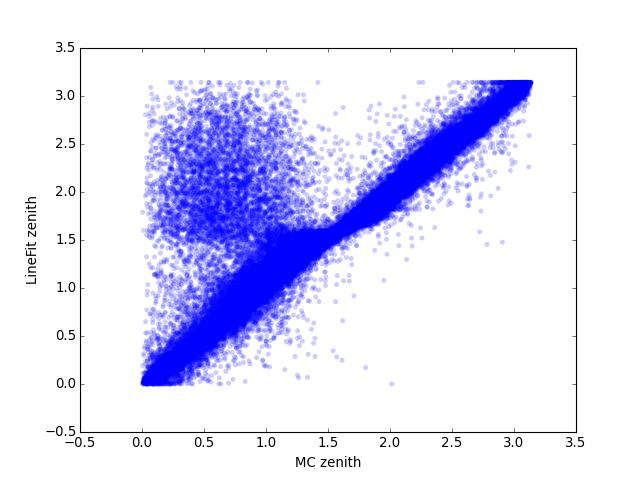

In [15]:
plt.figure()
plt.scatter(f.root.reco_vals[:]["zenith"], f.root.reco_vals[:]["zenith_linefit"],edgecolor='none',alpha=0.2)
plt.xlabel("MC zenith")
plt.ylabel("LineFit zenith")

<IPython.core.display.Javascript object>


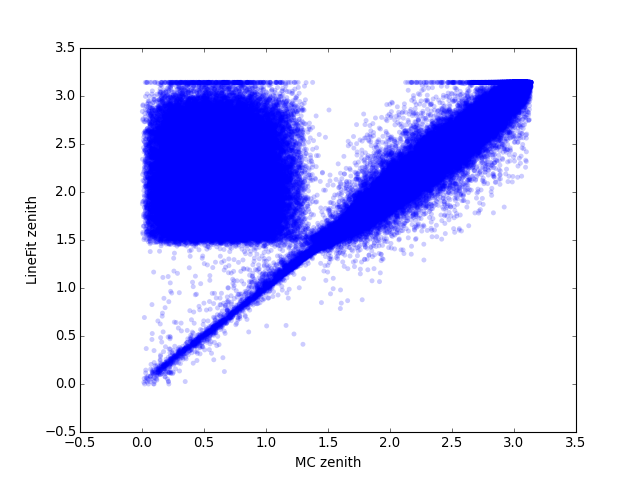

In [23]:
plt.figure()
plt.scatter(openfiles_low[0].root.reco_vals[:]["zenith"], openfiles_low[0].root.reco_vals[:]["zenith_linefit"],edgecolor='none',alpha=0.2)
plt.xlabel("MC zenith")
plt.ylabel("LineFit zenith")

<IPython.core.display.Javascript object>


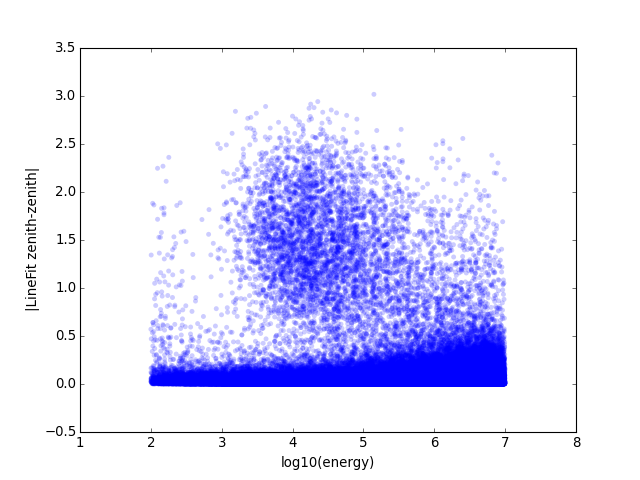

In [64]:
#goodness of linefit prediciton over energy of particle
plt.figure()
f=openfiles_high[0]
plt.scatter(np.log10(f.root.reco_vals[:]["energy"]) ,np.abs(f.root.reco_vals[:]["zenith"]-f.root.reco_vals[:]["zenith_linefit"]),edgecolor='none',alpha=0.2)
plt.xlabel("log10(energy)")
plt.ylabel("|LineFit zenith-zenith|")
plt.show()

<IPython.core.display.Javascript object>


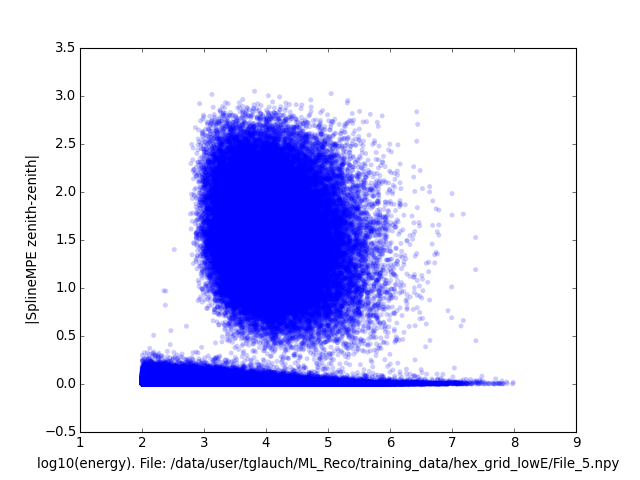

In [66]:
#goodness of linefit prediciton over energy of particle
plt.figure()
f=openfiles_low[0]
plt.scatter(np.log10(f.root.reco_vals[:]["energy"]) ,np.abs(f.root.reco_vals[:]["zenith"]-f.root.reco_vals[:]["zenith_splinempe"]),edgecolor='none',alpha=0.2)
plt.xlabel("log10(energy). File: {}".format(f.filename))
plt.ylabel("|SplineMPE zenith-zenith|")
plt.show()

In [27]:
summary(zenith, zenith_linefit)

zenith<pi/2: 93.76%
zenith>pi/2: 99.37%
total: 96.80%


In [58]:
for i, of in enumerate(openfiles_high):
    print '0{0}000-0{0}999:'.format(i)
    summary(of.root.reco_vals[:]["zenith"],of.root.reco_vals[:]["zenith_linefit"])
    print "-"*30

00000-00999:
zenith<pi/2: 93.76%
zenith>pi/2: 99.37%
total: 96.80%
------------------------------
01000-01999:
zenith<pi/2: 93.80%
zenith>pi/2: 99.42%
total: 96.85%
------------------------------
02000-02999:
zenith<pi/2: 93.70%
zenith>pi/2: 99.37%
total: 96.76%
------------------------------
03000-03999:
zenith<pi/2: 93.71%
zenith>pi/2: 99.42%
total: 96.81%
------------------------------
04000-04999:
zenith<pi/2: 93.90%
zenith>pi/2: 99.42%
total: 96.89%
------------------------------
05000-05999:
zenith<pi/2: 93.92%
zenith>pi/2: 99.40%
total: 96.89%
------------------------------
06000-06999:
zenith<pi/2: 93.91%
zenith>pi/2: 99.41%
total: 96.88%
------------------------------
07000-07999:
zenith<pi/2: 93.03%
zenith>pi/2: 99.27%
total: 96.45%
------------------------------


In [57]:
for i, of in enumerate(openfiles_low):
    print '0{0}000-0{0}999:'.format(i)
    summary(of.root.reco_vals[:]["zenith"],of.root.reco_vals[:]["zenith_linefit"])
    print "-"*30

00000-00999:
zenith<pi/2: 38.43%
zenith>pi/2: 99.56%
total: 93.43%
------------------------------
01000-01999:
zenith<pi/2: 38.94%
zenith>pi/2: 99.55%
total: 93.52%
------------------------------
02000-02999:
zenith<pi/2: 38.47%
zenith>pi/2: 99.57%
total: 93.41%
------------------------------
03000-03999:
zenith<pi/2: 39.36%
zenith>pi/2: 99.56%
total: 93.66%
------------------------------
04000-04999:
zenith<pi/2: 43.36%
zenith>pi/2: 99.57%
total: 94.62%
------------------------------
05000-05999:
zenith<pi/2: 38.59%
zenith>pi/2: 99.58%
total: 93.48%
------------------------------


<IPython.core.display.Javascript object>


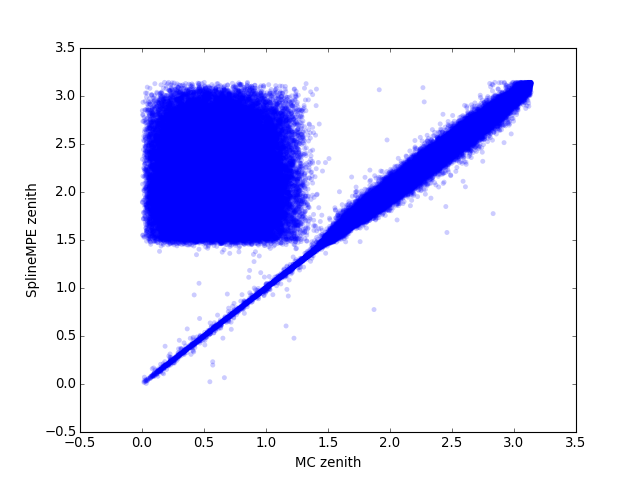

In [62]:
plt.figure()
plt.scatter(openfiles_low[0].root.reco_vals[:]["zenith"], openfiles_low[0].root.reco_vals[:]["zenith_splinempe"],edgecolor='none',alpha=0.2)
plt.xlabel("MC zenith")
plt.ylabel("SplineMPE zenith")

<IPython.core.display.Javascript object>


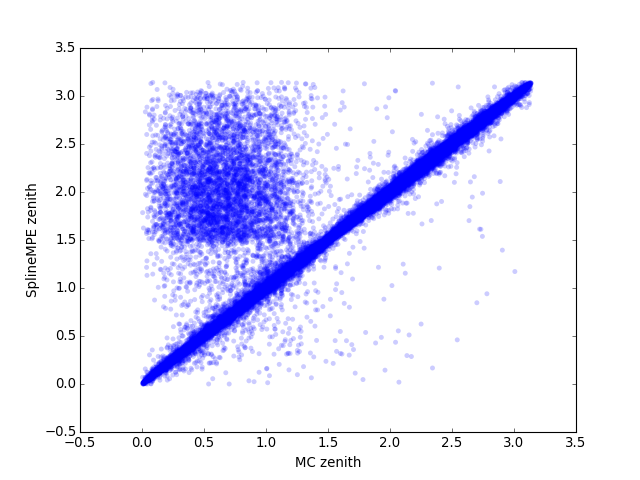

In [63]:
plt.figure()
plt.scatter(openfiles_high[0].root.reco_vals[:]["zenith"], openfiles_high[0].root.reco_vals[:]["zenith_splinempe"],edgecolor='none',alpha=0.2)
plt.xlabel("MC zenith")
plt.ylabel("SplineMPE zenith")